In [1]:
from IPython.display import display, Markdown, Latex

from product import Option
from strategy import *
from euronext import Page
from graph import Graph

g=Graph(4800, 5500, 25)
p = Page(ticker_idx=1)
p.fetch()
options = p.scrap_options()
call = p.call
put = p.put
for k, o in p.call.items():
    o.multiplier=10
for k, o in p.put.items():
    o.multiplier=10


In [ ]:
pspread1 = PutSpread(put[5150], put[5000])
print('{} Cost : {}'.format(pspread1.label, pspread1.cost()))
g.profit_strategy(pspread1)
pspread2 = PutSpread(put[5150], put[5100])
print('{} Cost : {}'.format(pspread2.label, pspread2.cost()))
g.profit_strategy(pspread2)
g.compare(pspread1, 'long', pspread2, 'long')



In [ ]:
def explorator(list_put, step=50):
    strikes = [o.strike for o in list_put]
    by_strike = dict(zip(strikes, list_put))
    css = []
    for i, strike_a in enumerate(strikes[:-1]):
        strike_b = strike_a + step
        if (strike_b not in strikes):
            continue
        a=by_strike[strike_a]
        b=by_strike[strike_b]
        css.append(PutSpread(b, a))
    return css

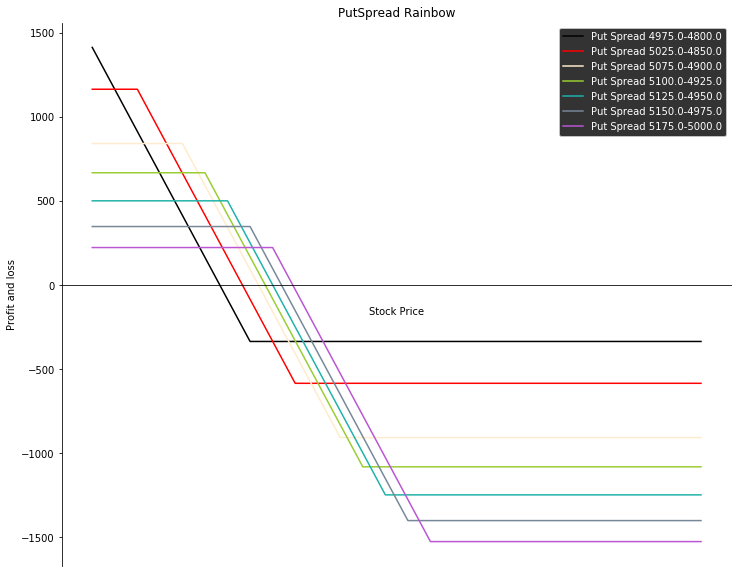

In [2]:
css = PutSpread.explorator(put.values(), step=175)
g.profit_rainbow(css, 'long', title='PutSpread Rainbow')